In [5]:
# load anscombe's quartet dataset
import seaborn as sns
anscombe = sns.load_dataset('anscombe')

anscombe




,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [6]:

# create " decision stump"
# fit tree regressor to anscombe's quartet 

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
X = anscombe[['x']]
y = anscombe['y']
dt.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


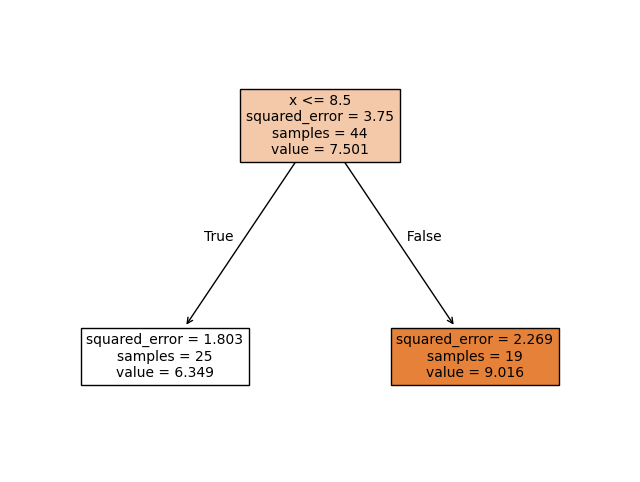

In [8]:
#plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
_ = plot_tree(dt, ax=ax, feature_names=['x'], filled=True, fontsize=10)



/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


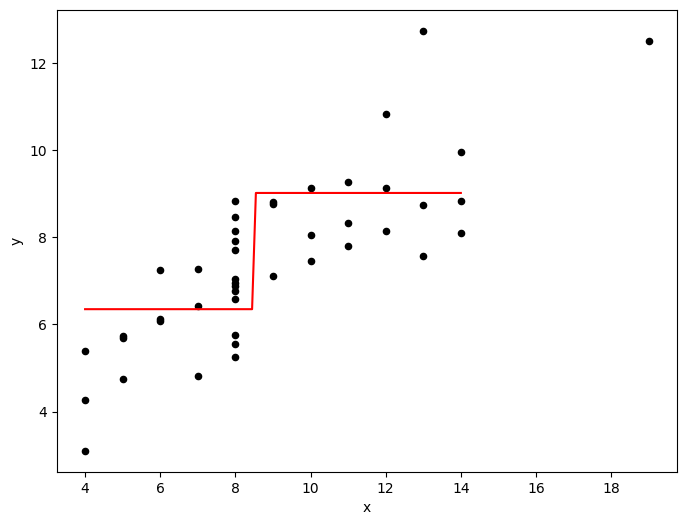

In [9]:
#plot the date and predictions on the same plot
import numpy as np
fig, ax = plt.subplots(figsize=(8,6))
anscombe.plot.scatter(x='x', y='y', ax=ax,color='k')
#plot the line 
x1 = np.linspace(4,14,100)
y1 = dt.predict(x1.reshape(-1,1))
ax.plot(x1, y1, color='r')


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


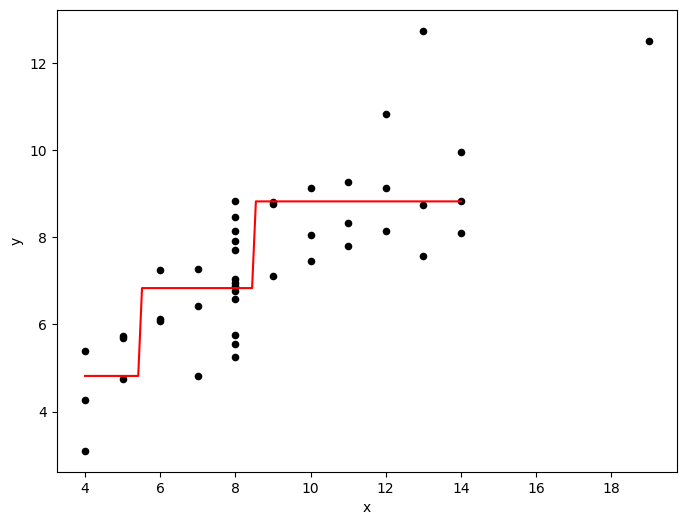

In [11]:
#now plot to two levels
fig, ax = plt.subplots(figsize=(8,6))
anscombe.plot.scatter(x='x', y='y', ax=ax,color='k')

#plot the line
dt2 = DecisionTreeRegressor(max_depth=2)
dt2.fit(X, y )

x1 = np.linspace(4,14,100)
y1 = dt2.predict(x1.reshape(-1,1))
ax.plot(x1, y1, color='r')


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


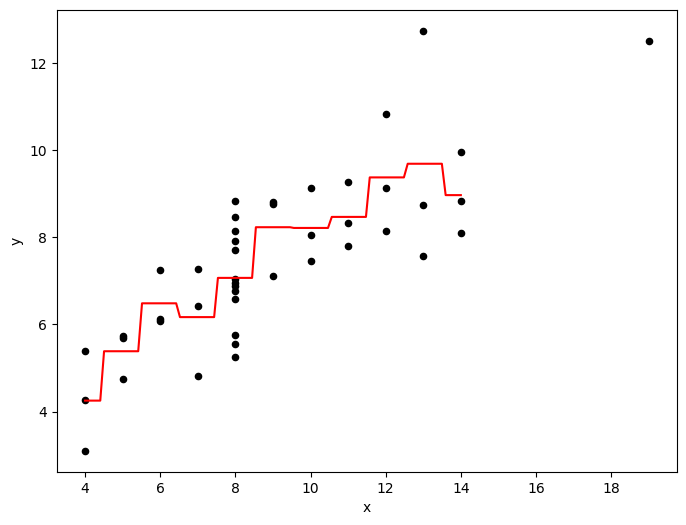

In [12]:
#now plot to two levels
fig, ax = plt.subplots(figsize=(8,6))
anscombe.plot.scatter(x='x', y='y', ax=ax,color='k')

#plot the line
dt2 = DecisionTreeRegressor(max_depth=None)
dt2.fit(X, y )

x1 = np.linspace(4,14,100)
y1 = dt2.predict(x1.reshape(-1,1))
ax.plot(x1, y1, color='r')

In [21]:
from datasets import load_dataset

# Correct way to load the numerical regression "elevators" dataset
elevators = load_dataset(   "inria-soda/tabular-benchmark",    data_files="reg_num/elevators.csv")

elevators


DatasetDict({
    train: Dataset({
        features: ['climbRate', 'Sgz', 'p', 'q', 'curRoll', 'absRoll', 'diffClb', 'diffRollRate', 'diffDiffClb', 'SaTime1', 'SaTime2', 'SaTime3', 'SaTime4', 'diffSaTime1', 'diffSaTime3', 'Sa', 'Goal'],
        num_rows: 16599
    })
})

In [20]:
elev = elevators['train'].to_pandas()
elev

,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime3,Sa,Goal
0,118.0,-55.0,-0.28,-0.08,-0.2,-11.0,11.0,0.005,-0.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.031
1,390.0,-45.0,-0.06,-0.07,-0.6,-12.0,11.0,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,-0.0008,0.034
2,68.0,6.0,0.11,0.15,0.6,-10.0,-9.0,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,-0.0010,0.033
3,-358.0,-12.0,-0.20,0.13,-0.3,-11.0,-7.0,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.032
4,-411.0,-19.0,-0.18,0.02,-0.5,-11.0,-3.0,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,299.0,-28.0,0.08,-0.12,-0.3,-9.0,15.0,0.010,-0.2,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,-0.0005,0.027
16595,84.0,0.0,0.14,0.14,1.1,-8.0,-11.0,-0.014,-0.6,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,-0.0009,0.026
16596,-208.0,-6.0,-0.48,0.09,0.2,-9.0,-7.0,-0.010,-0.1,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,-0.0009,0.023
16597,-146.0,-14.0,-0.38,-0.03,-0.8,-10.0,10.0,0.010,-1.0,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,-0.0005,0.022


In [23]:
X_elev = elev.drop(columns=['Goal'])
y_elev = elev['Goal']
dt_elev = DecisionTreeRegressor(max_depth=3)
dt_elev.fit(X_elev, y_elev)


,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


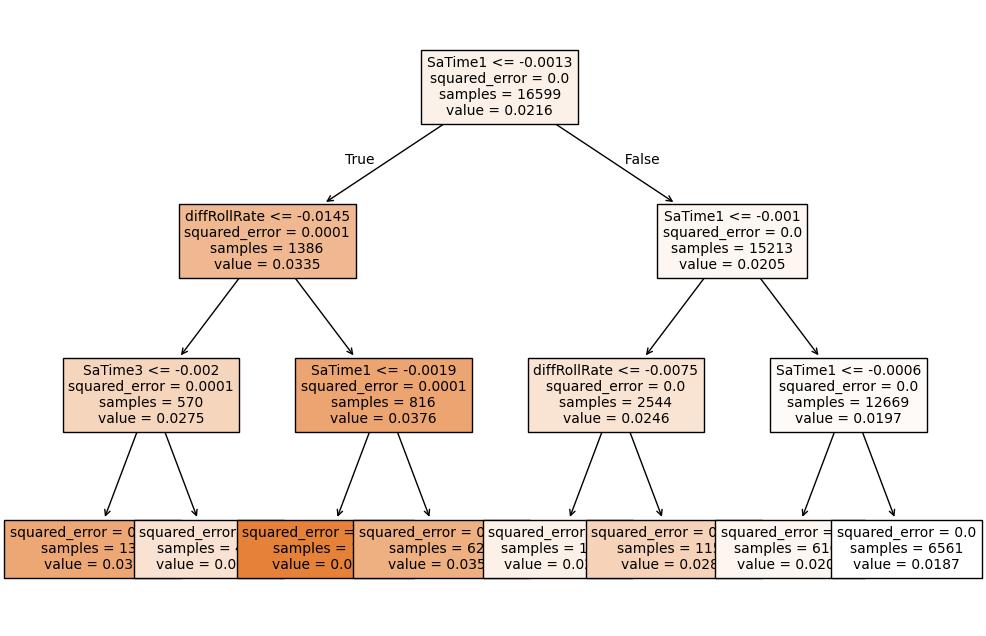

In [24]:
# plot the tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12,8))
_ = plot_tree(dt_elev, ax=ax, feature_names=X_elev.columns, filled=True, fontsize=10, precision=4)


In [25]:
dt_elev.score(X_elev, y_elev)


0.48738100110114524

In [26]:
from sklearn.linear_model import LinearRegression
lr_elev = LinearRegression()
lr_elev.fit(X_elev, y_elev)
lr_elev.score(X_elev, y_elev)


0.8134729462382582

<Axes: >

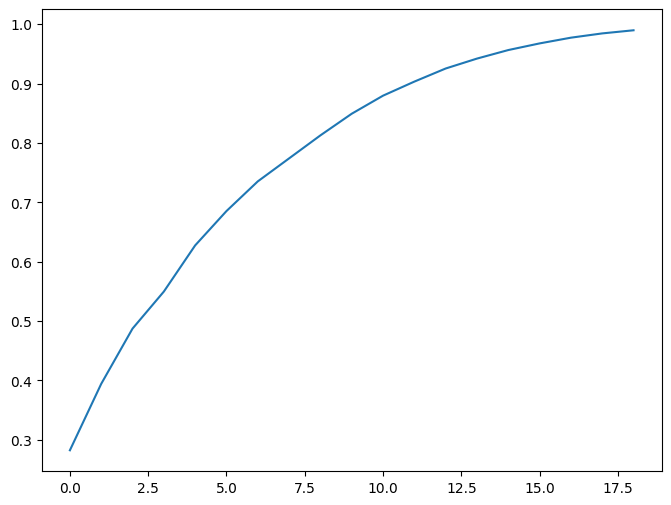

In [29]:
#loop over depths and plot the result
import pandas as pd
scores = []
for i in range(1, 20 ):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_elev, y_elev)
    scores.append(dt.score(X_elev, y_elev))

pd.Series(scores).plot.line(figsize=(8,6))


Text(0.5, 1.0, 'Validation Curve for Dcision Tree')

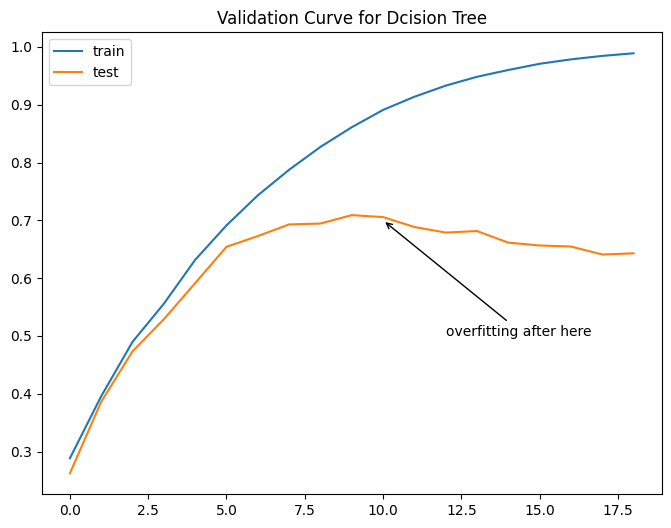

In [30]:
#split the data and plot results of train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_elev, y_elev, random_state=42)
test_scores = []
train_scores = []
for i in range(1, 20 ):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

ax = pd.DataFrame({'train':train_scores, 'test':test_scores}).plot.line(figsize=(8,6))

#annotate overfitting at 10, .7
ax.annotate('overfitting after here ', xy=(10, .7), xytext=(12, .5), arrowprops={'arrowstyle':'->'})

# set tile
ax.set_title('Validation Curve for Dcision Tree')


In [31]:
#let's see if our model improves with a deeper tree
dt_elev = DecisionTreeRegressor(max_depth=11)
dt_elev.fit(X_train, y_train)
dt_elev.score(X_test, y_test)


0.70249051557071

In [32]:
lr_elev = LinearRegression()
lr_elev.fit(X_train, y_train)
lr_elev.score(X_test, y_test)


0.8174575653756876

In [35]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.5251911705198601

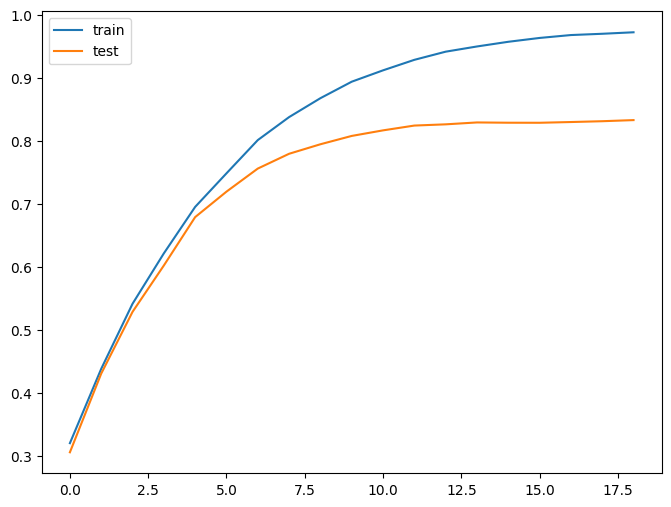

In [36]:
#sweep over depths and plot results
test_scores = []
train_scores = []
for i in range(1, 20 ):
    rf = RandomForestRegressor(n_estimators=100, max_depth=i)
    rf.fit(X_train, y_train)
    test_scores.append(rf.score(X_test, y_test))
    train_scores.append(rf.score(X_train, y_train))

ax = pd.DataFrame({'train':train_scores, 'test':test_scores}).plot.line(figsize=(8,6))

In [37]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=13 , random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.8270018326681252

In [40]:
from xgboost import XGBRegressor  # Import the class from the module

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)


0.8764783616363858

In [42]:
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

raw = sns.load_dataset('titanic')
raw.head()
raw

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [49]:
titanic_X = ( raw 
             .loc[:, ['pclass','age', 'sibsp', 'parch', 'fare']]
             .dropna()
)

titanic_X
titanic_y = ( raw 
             ['survived']
             .loc[titanic_X.index])




In [ ]:
# split  data
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, random_state=42)




In [52]:
X_train

,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime3,Sa
12902,235.0,-4.0,0.02,0.16,1.0,-7.0,-5.0,-0.018,0.0,-0.0009,-0.0009,-0.0009,-0.0010,0.0000,0.0001,-0.0010
12509,-37.0,-1.0,0.04,0.17,-1.5,-16.0,-7.0,0.010,0.0,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0000,-0.0008
9002,-431.0,-69.0,-0.19,0.01,-0.5,-13.0,5.0,0.005,0.1,-0.0009,-0.0009,-0.0009,-0.0010,0.0000,0.0001,-0.0010
10023,360.0,18.0,-0.02,0.04,-0.5,-10.0,1.0,0.003,0.0,-0.0006,-0.0006,-0.0006,-0.0006,0.0000,0.0000,-0.0006
9697,-143.0,-31.0,0.07,0.20,1.0,-9.0,-23.0,-0.019,0.5,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0000,-0.0009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,72.0,-12.0,-0.14,0.04,0.3,-7.0,-4.0,0.005,0.3,-0.0004,-0.0004,-0.0004,-0.0004,0.0000,0.0000,-0.0004
11964,-240.0,-22.0,-0.28,0.05,0.8,-10.0,-2.0,-0.005,0.0,-0.0007,-0.0007,-0.0007,-0.0007,0.0000,0.0000,-0.0007
5390,68.0,-40.0,-0.37,-0.08,0.1,-6.0,9.0,-0.003,-0.1,-0.0004,-0.0005,-0.0005,-0.0005,0.0001,0.0000,-0.0005
860,-230.0,-36.0,-0.43,-0.18,1.0,-13.0,26.0,-0.014,1.6,-0.0012,-0.0012,-0.0012,-0.0012,0.0000,0.0000,-0.0012


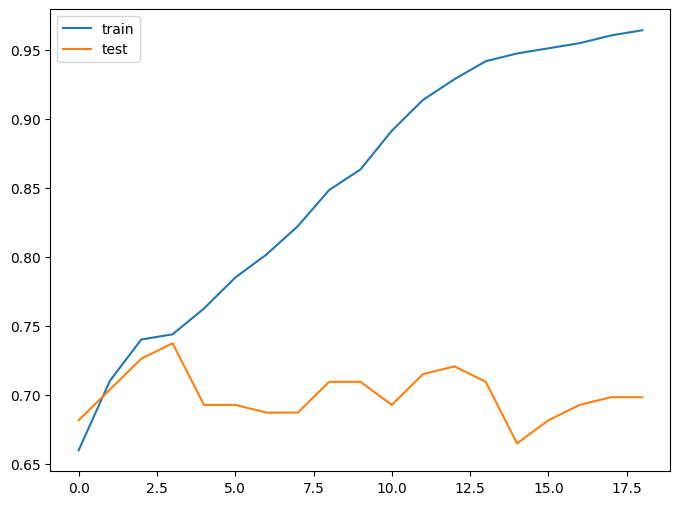

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# X = input features, make sure to drop target column from it
X = raw[['pclass', 'age', 'sibsp', 'parch', 'fare']].dropna()
y = raw.loc[X.index, 'survived']  # categorical target (0 or 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

train_scores = []
test_scores = []

for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    test_scores.append(dt.score(X_test, y_test))
    train_scores.append(dt.score(X_train, y_train))


ax = pd.DataFrame({'train':train_scores, 'test':test_scores}).plot.line(figsize=(8,6))